<a href="https://colab.research.google.com/github/KiboSennin/ADA-Informes-/blob/main/Optimal_BST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) Descripcion del problema

El problema usual para la aplicacion de este tipo de algoritmos es la busqueda de algun tipo de web o relacionados, esto es debido a la necesidad de almacenar claves, usuarios, registros, palabras claves, codigos entre otros, para ello se almacenan en algun lugar y para poder buscarlos es muy complicado una vez hay unos cuantos datos.

Para ello se usa la busqueda binaria optima (BTS), la cual consiste en la busqueda de los nodos un arbol el cual se genera para esta busqueda.

Para la entrada tenemos:
* Una secuencia de K ($k_1, k_2, k_3,...,k_n$)
* Ademas cada $k_i$ tiene una probabilidad $p_i$ asignada 
* Junto a esto tambien tenemos que dentro de las busquedas de k hay busquedas ficticias fallidad las cual denominamos como $d_i$
* Cada valor correspondiente a $d_i$ tiene una probabilidad asociada, esta es $q_i$
* Las probabilidades corresponde a la posibilidad de que un valor sea buscado

Como salida tenemos que:
* Se genere un arbol optimo que minimice los nodos de busqueda para cada problema.
* Encontrar y retornar el costo minico de cada arbol.

## 1.1) Descripcion del algoritmo

El algoritmo busca el camino optimo de un arbol para encontrar la mejor solucion dependiendo de cada caso

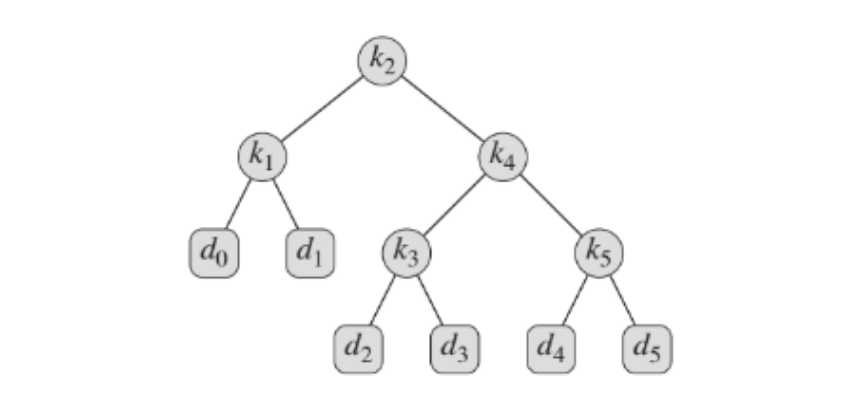

Para ello vemos el costo de cada camino

* Primero vemos si el tamaño del arbol, si este es menor a uno significa que no hay arbol para recorrer.
* Luego recorremos el arbol buscando el valor por derecha o izquierda correspondientemente.
* Cuando se termina de recorrer una rama del arbol se calcula el costo de dicho recorrido sumando el costo de cada nodo.
* Finalmente se verifica el costo optimo y retorna dicho costo.

# 2) Codigo

Recursivo

In [38]:
def oBST_Rec(freq, i, j, verbose):

  global contador                                                
  
  if j < i:                                                        
      return 0
  
  if j == i:     
    return frec[i]
  
  aux = 0                                                           
  
  for k in range(i, j + 1):
    aux += frec[k]
  
  if verbose:
    print("Suma Frec: ", aux)
    
  min = float("inf")                                                
     
  for r in range(i, j + 1):                                         
    contador += 2
    
    if verbose:
      print("Calculo Cost Min: ", {frec[i:r-1]}, " y " ,{frec[r+1:j]} )
    
    
    costo = (oBST_Rec(frec, i, r - 1, verbose) + oBST_Rec(frec, r + 1, j, verbose))
    
    if costo < min:
      if verbose:
        print("Buscando al menor: ", {min}, " y " ,{costo} )
      min = costo
                                                        
  if verbose:
    print("\n")
    print("Costo Minimo: ", min + aux)    
    

  return min + aux

In [39]:
claves = [10, 12, 20]
frec = [34, 8, 50]
n = len(claves)
verbose = False
contador = 0

print("Cost: ", oBST_Rec(frec,0, n-1, verbose))
print("Calls: ", contador)
print("\n")

Cost:  142
Calls:  14




Dinamico

In [20]:
def oBST_Din(claves,frec,n,verbose):

  costo = [[0 for x in range(n)] for y in range(n)]                            
  global contador 

  for i in range(n):                                                            
    costo[i][i] = frec[i]

  for l in range(2,n+1):
    for i in range(n - l+1):
      j = i + l - 1

      suma = 0
      for k in range(i, j+1):                                                   
        suma += frec[k]

      if verbose:
        print("Sumas Frec:",suma)

      if i >= n or j >=n:                                                       
        break
      costo[i][j] = float("inf")                                                

      for r in range(i,j+1):                                                    
        if verbose:
          print("Buscando Valores: ")
        contador += 1
        aux = 0
        if r > i:
          if verbose:
            print("Comparamos: " ,{r}, " - " ,{i})
          aux += costo[i][r-1]
          if verbose:
            print("Costo Minimo: ", aux)
        if r < j:
          if verbose:
            print("Comparamos:"  ,{r + 1}, " - " ,{i})
          aux += costo[r+1][j]
        aux += suma
        if verbose:
          print("Costo Actualizado: ", aux)
        if aux < costo[i][j]:
          costo[i][j] = aux
        if verbose:
          print("Costo Minimo:",costo[0][n - 1])
          print("\n")

  return costo[0][n-1]
 


In [25]:
claves = [10, 12, 20]
frec = [34, 8, 50]
n = len(claves)
verbose = False
contador = 0

print("Cost: ", oBST_Din(claves, frec, n, verbose))
print("Calls: ", contador)
print("\n")


Cost:  142
Calls:  7




# 3) Correctitud

En un árbol binario de busqueda optimo vamos recurriendo las ramas hasta llegar a las ojas y de esta forma poder encotrar un cierto valor, objeto, basicamente un algo a buscar, por ese mismo motivo nosotros queremos buscar una hoja hija y subir ese valor a la raiz.

Cada vez que queremos pasar un valor pasa por los nodos y cada paso por un nodo es un subproblema que hay que resolver para llegar con el valor requerido a la raiz entonces una busqueda binaraia termina siendo la suma cada vez que en una busqueda pasamos por un nodo.

$C(T) =  \displaystyle \sum_{l=i}^{j}p_l (deph_t(l) + 1)$

y costo de los subproblemas sera:

$C_{ij} = $ $min C(T)$.
$_{tㅤonㅤi,....,ㅤj}$

Luego tenemos la funcion de recurrencia 

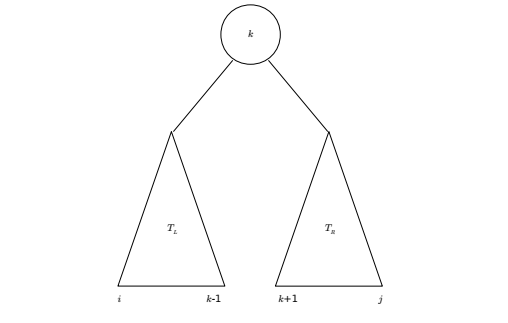

y con esta foto podemos inferir la siguiente relacion

$C(T) =  \displaystyle \sum_{l=i}^{j}p_l (deph_t(l) + 1)$


$ = $   $\displaystyle \sum_{l=i}^{j}p_l (deph_{TL} (l) + 1 + 1) + pk + \displaystyle \sum_{l=i}^{j}p_l (deph_{TR} (l) + 1 + 1) $


$= $ $C(T_L) + C(T_R) +\displaystyle \sum_{l=i}^{j}p_l  $

Definimos la recurrencia como  ${C}'_{ij}$

 ${C}'_{ij}$ $=$ $\left\{\begin{matrix} min_{i\leq k\leq j} ({C}'_{i, k-1} + {C}'_{ij}) +\displaystyle \sum_{l=i}^{j}p_lㅤ;ㅤsiㅤi < j
 \\P_iㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤ;ㅤsiㅤi = j
 \\0ㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤ;ㅤsi ㅤi > j
\end{matrix}\right.$

Con lo que podemos demostrar que la correctitud del algoritmo es la siguiente:

Por induccion en $J - i$ el mejor caso es trivial

 ${C}_{ij} \leq  {C}'_{ij}$ por lo anterior calculamos  ${C}'_{ij}$ es el costo de algunas $BST$ en $i,...,j$ y  ${C}_{ij}$ es el costo optimo para $BST$

  ${C}_{ij}$ $ \geq $ ${C}'_{ij}$ supongamos que la raiz optima $BSt$ es k luego

  ${C}_{ij}$ = ${C}_{k - 1,ㅤj} +  {C}_{k + 1,ㅤj} ㅤ+ \displaystyle \sum_{l=i}^{j}p_l $


  $\geq$  ${C}'_{i,ㅤk - 1}ㅤ+ㅤ{C}'_{k + 1,ㅤj} ㅤ+ \displaystyle \sum_{l=i}^{j}p_l $


  $\geq$ $min ({C}'_{i,ㅤk - 1}ㅤ+ㅤ{C}'_{k + 1,ㅤj}ㅤ) + \displaystyle \sum_{l=i}^{j}p_l$


  $= $ ${C}'_{ij}$

# 4) Tiempo de ejecucion

Para la version dinamica sera:


```
Algorithm OBST(p, q, n)
// e[1…n+1, 0…n ] : Optimal sub tree
// w[1…n+1,  0…n] : Sum of probability
// root[1…n, 1…n] : Used to construct OBST

for i ← 1 to n + 1 do
    e[i, i – 1] ← qi – 1
    w[i, i – 1] ← qi – 1
end

for m ← 1 to n do
    for i ← 1 to n – m + 1 do
        j ← i + m – 1 
        e[i, j] ← ∞
        w[i, j] ← w[i, j – 1] + pj + qj
        for r ← i to j do
            t ← e[i, r – 1] + e[r + 1, j] + w[i, j]
            if t < e[i, j] then
                e[i, j] ← t
                root[i, j] ← r
            end
        end
    end
end
return (e, root)

```



Con ese Pseudo codigo podemos ver que la complejidad recide en el triple ciclo "For" en el cual al calcular la sumatoria de eso nos da que el tiempo de ejecucion es $T(n)= Θ(n^3)$, a continuacion esta la demostracion matematica de esto.

T(n) = 
$ \displaystyle \sum_{m =1}^{n} $$\displaystyle \sum_{i = 1}^{n-m + ln - l -1}$$\displaystyle \sum_{j=1} Θ(1)$


$=>$ $\displaystyle \sum_{m=1}^{n} $$\displaystyle \sum_{n=1}^{n-m+1}n $ $=$ $\displaystyle \sum_{m=1}^{n}n^2 $


$=$ $Θ($n^3$)$

Version Recursiva

A continuacion muestro el psudo codigo de la version recursiva del optimal bst

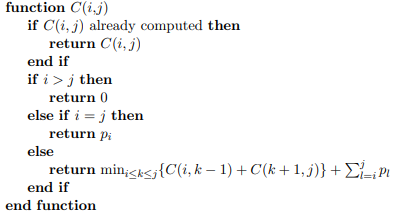

Teniendo eso en cuenta nos damos cuenta que se realizan 2 sumas importantes que son las que definen la velocidad del codigo por un lado tenemos a $(C(i, k -1) + C(k + 1, j))$ por otro lado tenemos a $\displaystyle \sum_{l=i}^{j}P_l $

Con esto podemos sacar 2 sumatorias y a su vez sacamos el tiempo de ejecucion el cual corresponde a $T(n) = n^2$

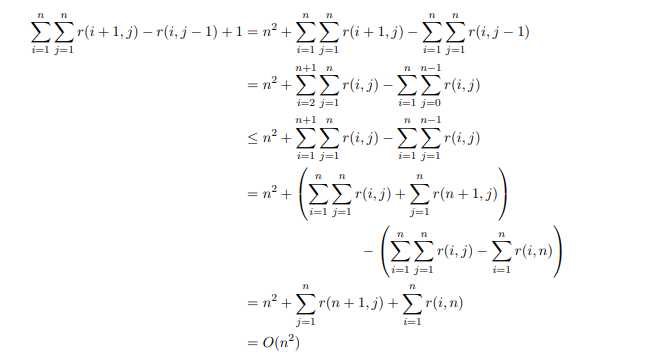

# 5) Experimentos

In [40]:
import random
import numpy as np

def optimal_bst_instance_generator(n):
    keys = sorted(random.sample(range(1, 100), n))
    arr = np.random.random(n*2+1)
    arr /= arr.sum()
    
    p = list(arr[:n]) # Probabilidad de las claves
    q = arr[n:] # Probabilidad de las claves ficticias
    return keys, p, q
    
keys, p, q = optimal_bst_instance_generator(10)

In [62]:
def oBST_Din_ex(claves,frec,n):

  costo = [[0 for x in range(n)] for y in range(n)]                            
  global contador 

  for i in range(n):                                                            
    costo[i][i] = frec[i]

  for l in range(2,n+1):
    for i in range(n - l+1):
      j = i + l - 1

      suma = 0
      for k in range(i, j+1):                                                   
        suma += frec[k]

      if verbose:
        print("Sumas Frec:",suma)

      if i >= n or j >=n:                                                       
        break
      costo[i][j] = float("inf")                                                

      for r in range(i,j+1):                                                    
        if verbose:
          print("Buscando Valores: ")
        contador += 1
        aux = 0
        if r > i:
          if verbose:
            print("Comparamos: " ,{r}, " - " ,{i})
          aux += costo[i][r-1]
          if verbose:
            print("Costo Minimo: ", aux)
        if r < j:
          if verbose:
            print("Comparamos:"  ,{r + 1}, " - " ,{i})
          aux += costo[r+1][j]
        aux += suma
        if verbose:
          print("Costo Actualizado: ", aux)
        if aux < costo[i][j]:
          costo[i][j] = aux
        if verbose:
          print("Costo Minimo:",costo[0][n - 1])
          print("\n")

  return costo[0][n-1]
 

In [66]:
def oBST_Rec_ex(i, frec, j):
  global contador                                                
  
  if j < i:                                                        
      return 0
  
  if j == i:     
    return frec[i]
  
  aux = 0                                                           
  
  for k in range(i, j + 1):
    aux += frec[k]
  
  if verbose:
    print("Suma Frec: ", aux)
    
  min = float("inf")                                                
     
  for r in range(i, j + 1):                                         
    contador += 2
    
    if verbose:
      print("Calculo Cost Min: ", {frec[i:r-1]}, " y " ,{frec[r+1:j]} )
    
    
    costo = (oBST_Rec(frec, i, r - 1, verbose) + oBST_Rec(frec, r + 1, j, verbose))
    
    if costo < min:
      if verbose:
        print("Buscando al menor: ", {min}, " y " ,{costo} )
      min = costo
                                                        
  if verbose:
    print("\n")
    print("Costo Minimo: ", min + aux)    
    

  return min + aux

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from timeit import repeat
import numpy as np

x=[]
y_Dynamic = []
y_NoDynamic = []

for n in range(1,15):
  keys, freq, q = optimal_bst_instance_generator(n)
  cont = 0
  cont2 = 0

  t_Dynamic = repeat(setup="from __main__ import oBST_Din_ex", stmt=f"oBST_Din_ex({keys},{freq},{len(keys)})", repeat=1, number=10)

  t_NoDynamic = repeat(setup="from __main__ import oBST_Rec_ex", stmt=f"oBST_Rec_ex({keys},{freq},{len(keys)})", repeat=1, number=10)

  x.append(n)
  y_Dynamic.append(t_Dynamic)
  y_NoDynamic.append(t_NoDynamic)

plt.plot(x,y_NoDynamic)
plt.plot(x,y_Dynamic)
plt.legend(["ArbolDeBusquedaRecursivo","ArbolDeBusquedaOptimoDinamico"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

TypeError: ignored